# Rozdział 2 - Mieszkania

### 1 - Importowanie danych

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

### 2 - Wczytanie danych

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

### 3 - Analiza danych

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


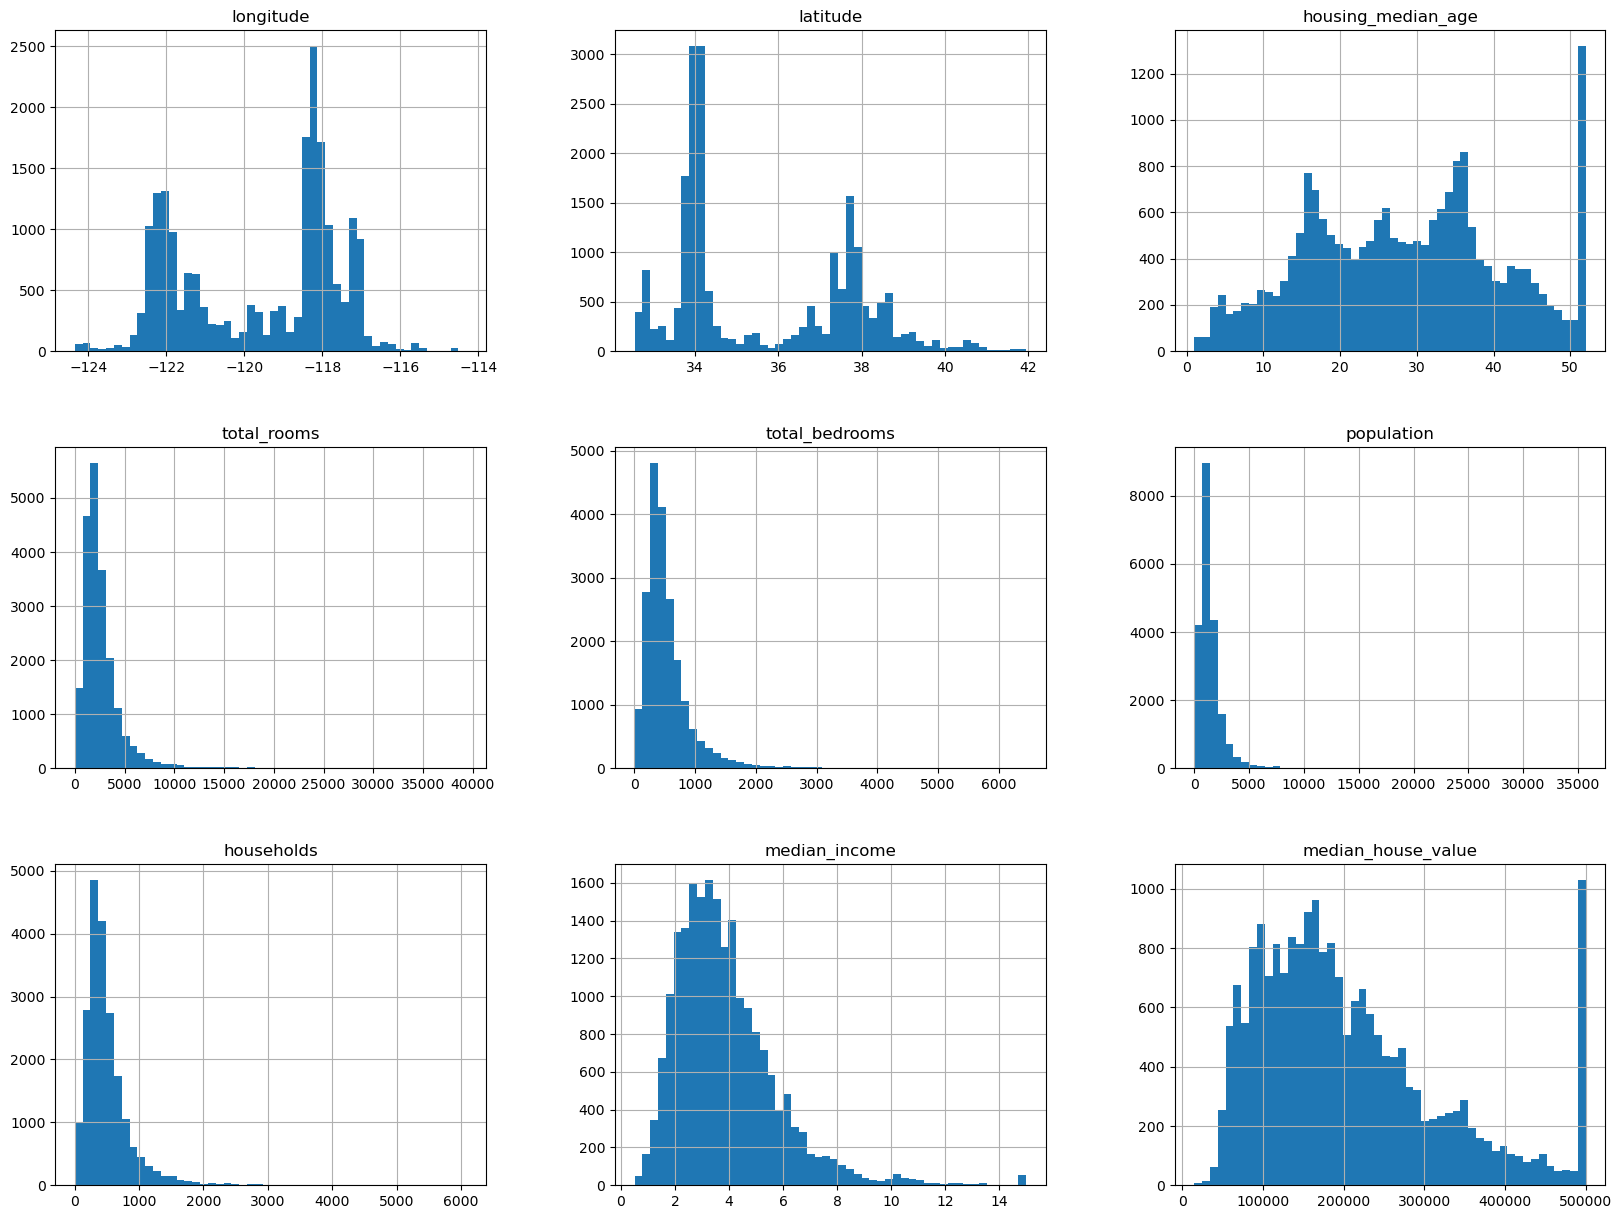

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

### 4 - Tworzenie zbioru testowego

<b>4.1 Tworzenie nowego atrybutu umożliwiającego zachowanie rzeczywistego rozkładu mediany dochodów</b>

In [11]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

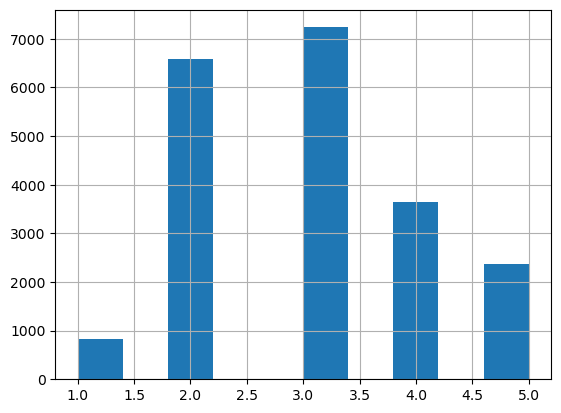

In [12]:
housing["income_cat"].hist()
plt.show()

In [13]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<b>4.2 Próbkowanie losowe</b>

In [14]:
from sklearn.model_selection import train_test_split

train_set_completely_random, test_set_completely_random = train_test_split(housing, test_size=0.2, random_state=None)
train_set_seed_random, test_set_seed_random = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
train_set_completely_random["income_cat"].value_counts() / len(train_set_completely_random)

3    0.350472
2    0.319041
4    0.175690
5    0.113978
1    0.040819
Name: income_cat, dtype: float64

In [16]:
test_set_completely_random["income_cat"].value_counts() / len(test_set_completely_random)

3    0.351017
2    0.318072
4    0.178779
5    0.116279
1    0.035853
Name: income_cat, dtype: float64

In [17]:
train_set_seed_random["income_cat"].value_counts() / len(train_set_seed_random)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [18]:
test_set_seed_random["income_cat"].value_counts() / len(test_set_seed_random)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

<b>4.3 Próbkowanie warstwowe</b>

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

<b>4.4 Usunięcie pomocniczej zmiennej</b>

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 5 - Wizualizacja danych geograficznych

Tworzenie kopii danych

In [23]:
housing = strat_train_set.copy()

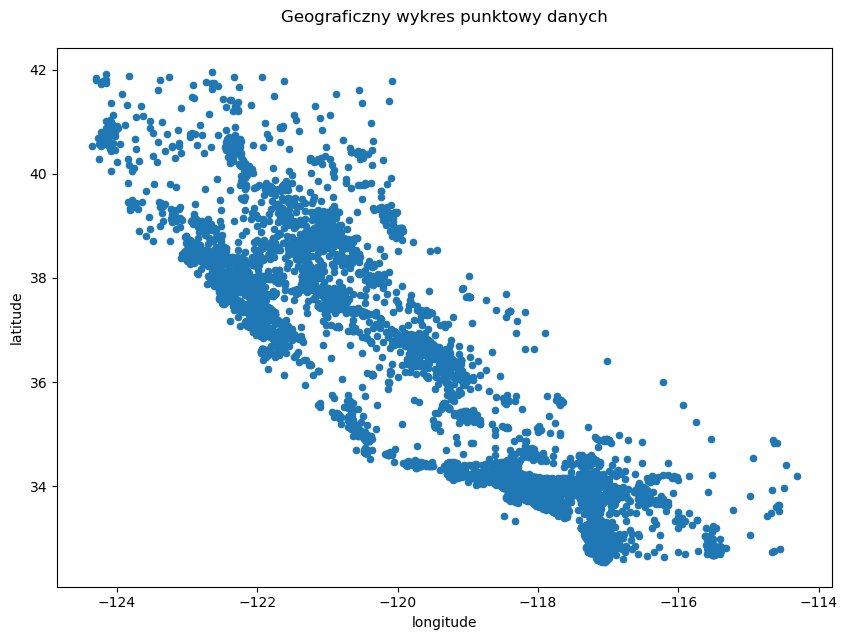

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.title("Geograficzny wykres punktowy danych\n")
plt.show()

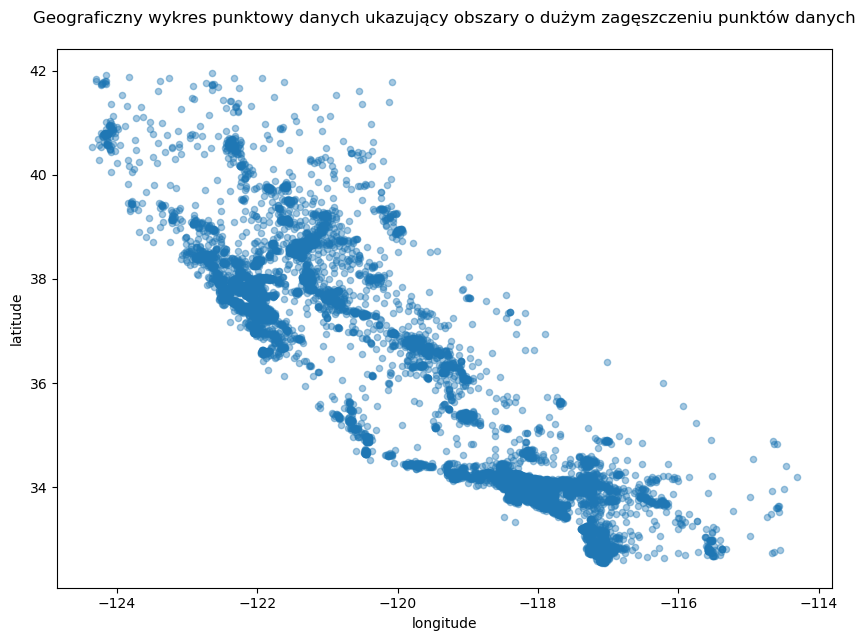

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10, 7))
plt.title("Geograficzny wykres punktowy danych ukazujący obszary o dużym zagęszczeniu punktów danych\n")
plt.show()

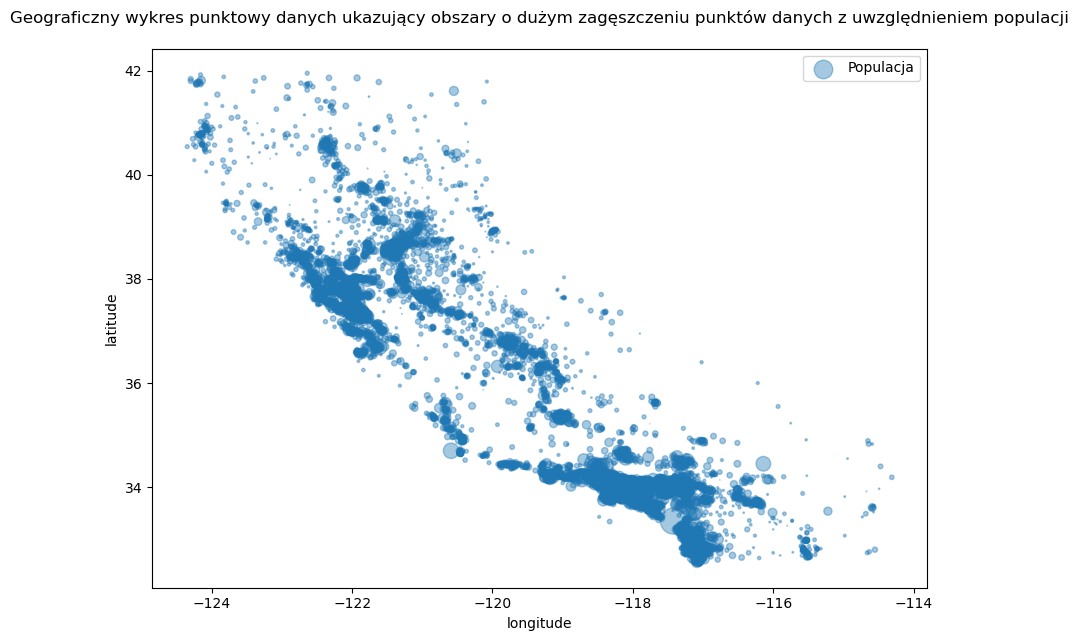

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Populacja", figsize=(10, 7))
plt.title("Geograficzny wykres punktowy danych ukazujący obszary o dużym zagęszczeniu punktów danych z uwzględnieniem populacji\n")
plt.show()

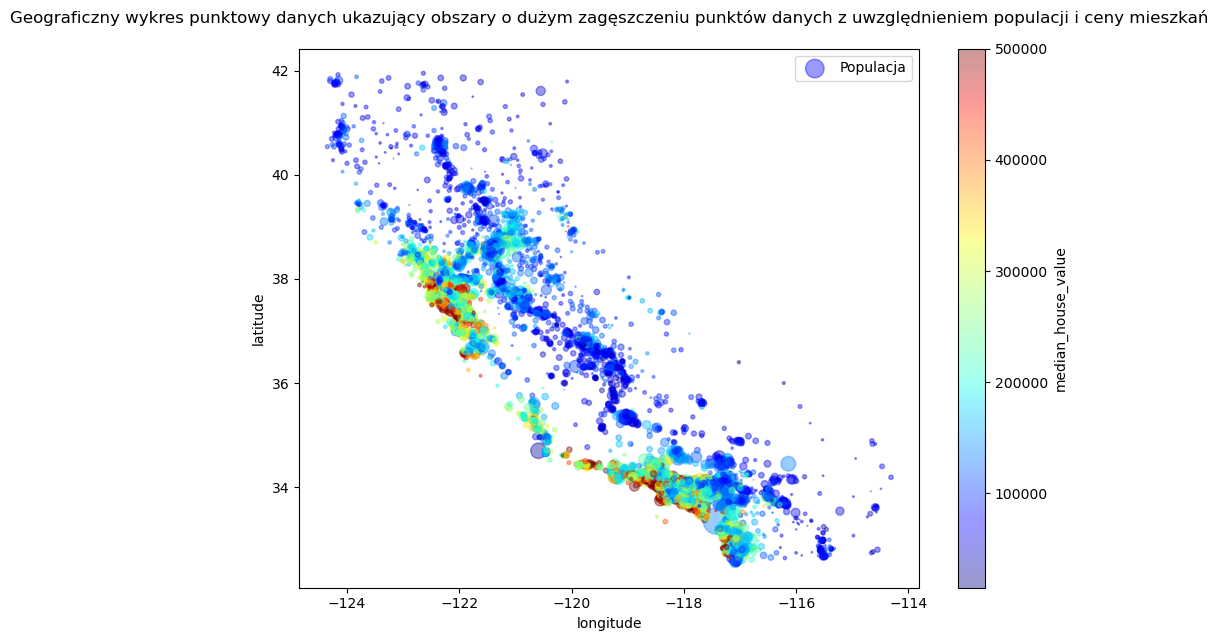

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Populacja", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title("Geograficzny wykres punktowy danych ukazujący obszary o dużym zagęszczeniu punktów danych z uwzględnieniem populacji i ceny mieszkań\n")
plt.legend()
plt.show()

### 6 - Korelacja

<b>6.1 Poszukiwanie korelacji</b>

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

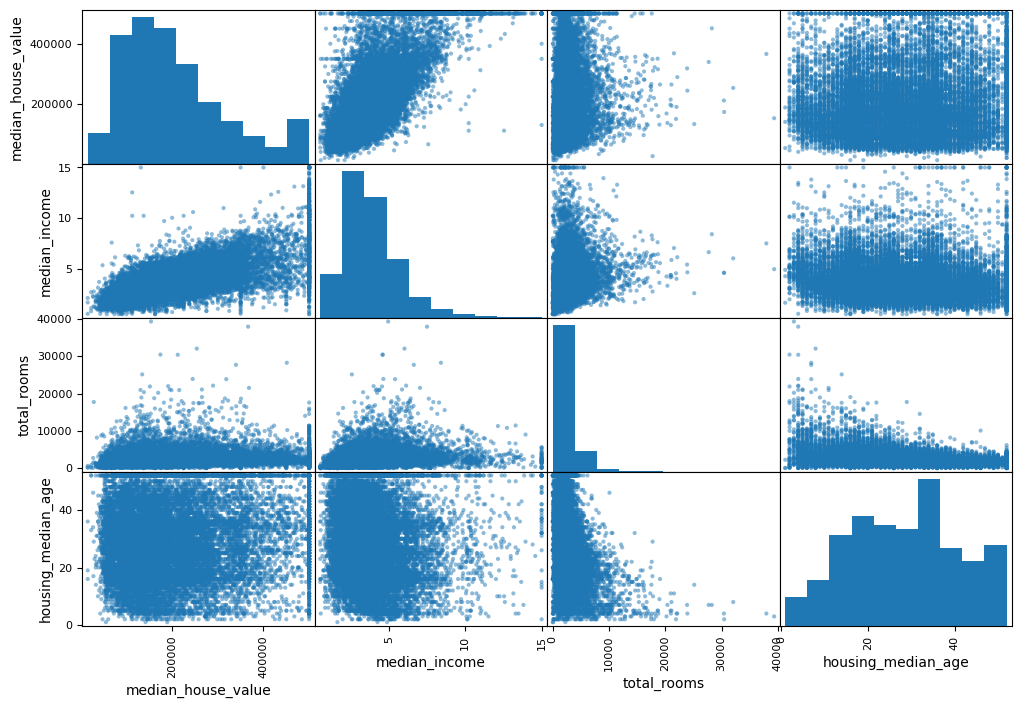

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

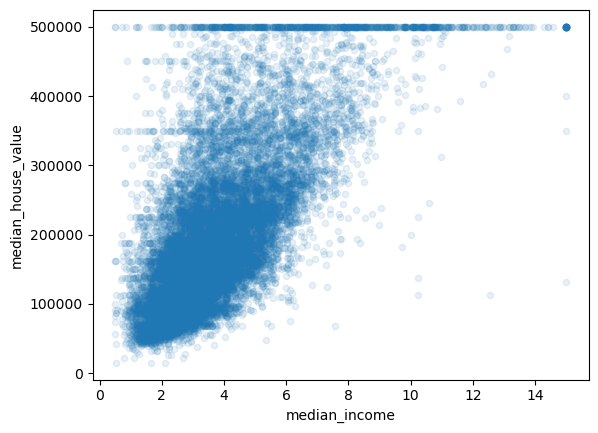

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

<b>6.2 Eksperymentowanie z kombinacjami atrybutów</b>

In [31]:
housing["Pokoje_na_rodzinę"] = housing["total_rooms"]/housing["households"]
housing["Sypialnie_na_pokoje"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["Populacja_na_rodzinę"] = housing["population"]/housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
Pokoje_na_rodzinę       0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
Populacja_na_rodzinę   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
Sypialnie_na_pokoje    -0.259952
Name: median_house_value, dtype: float64

### 7 - Oczyszczanie danych

<b>Powrót do pierwotnego zbioru uczącego</b>

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

<b>Występują trzy możliwości poradzenia sobie z niepełnymi danymi w danych atrybutach:</b>
- pozbyć się dystryktów zawierających brakujące dane
- pozbyć się całego atrybutu
- uzupełnić dane określoną wartością

In [34]:
housing.dropna(subset=["total_bedrooms"]) # opcja 1
housing.drop("total_bedrooms", axis=1) # opcja 2
median = housing["total_bedrooms"].median() # opcja 3
housing["total_bedrooms"].fillna(median, inplace=True)

<b>7.1 Uzupełnianie danych (numerycznych) określoną wartością z wykorzystaniem Scikit-Learn</b>

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Mediana może być wyznaczona jedynie z wartości numerycznych

In [36]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [37]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [39]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [40]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [41]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


<b>7.2 Przekształcanie atrybutów kategorialnych z wykorzystaniem Scikit-Learn</b>

##### 7.2.1 Przekształcenie ordynarne

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### 7.2.2 Przekształcenie bardziej zaawansowane - kodowanie "gorącojedynkowe"

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray() # Przekształcenie z macierzy rzadkiej do tablicy NumPy

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 8 - Niestandardowe transformatory

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None): # nie robi nic innego
        return self

    def transform(self, X):
        rooms_per_family = X[:, rooms_ix] / X[:, households_ix]
        population_per_family = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_family, population_per_family, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_family, population_per_family]

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### 9 - Potoki transformujące

<b>9.1 Potok dla atrybutów numerycznych (ze skalowaniem)</b>

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [51]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

<b>9.2 Potok dla wszystkich atrybutów(ze skalowaniem)</b>

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 10 - Trenowanie i ocena modelu

<b>10.1 Regresja liniowa</b>

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [56]:
some_data_prepared = full_pipeline.transform(some_data)

In [57]:
print("Prognozy: ", lin_reg.predict(some_data_prepared))
print("Etykiety: ", list(some_labels))

Prognozy:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Etykiety:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [58]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Błąd RMSE: ", lin_rmse)

Błąd RMSE:  68627.87390018745


<b>10.2 Drzewo decyzyjne</b>

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Błąd RMSE: ", tree_rmse)

Błąd RMSE:  0.0


<b>10.3 Sprawdzian krzyżowy - regresja liniowa</b>

Ze zbioru uczącego można wyodrębnić zbiór weryfikujący i korzystając z niego ocenić model. W tym przypadku wykorzystany zostanie jednak sposób o nazwie sprawdzian krzyżowy.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Wyniki: ", lin_rmse_scores)
print("Średnia: ", lin_rmse_scores.mean())
print("Odchylenie standardowe: ", lin_rmse_scores.std())

Wyniki:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Średnia:  69104.07998247063
Odchylenie standardowe:  2880.328209818068


<b>10.4 Sprawdzian krzyżowy - drzewo decyzyjne</b>

In [63]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Wyniki: ", tree_rmse_scores)
print("Średnia: ", tree_rmse_scores.mean())
print("Odchylenie standardowe: ", tree_rmse_scores.std())

Wyniki:  [73573.22477749 69452.1686857  68899.67267628 71679.49083569
 68835.31478299 78736.86893106 70884.31502512 72372.61012947
 69092.38603869 70720.28741289]
Średnia:  71424.63392953757
Odchylenie standardowe:  2867.8717742823055


<b>10.5 Model losowego lasu</b>

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Błąd RMSE: ", forest_rmse)

Błąd RMSE:  18680.639690425374


<b>10.5 Sprawdzian krzyżowy - las losowy</b>


In [66]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Wyniki: ", forest_rmse_scores)
print("Średnia: ", forest_rmse_scores.mean())
print("Odchylenie standardowe: ", forest_rmse_scores.std())

Wyniki:  [51616.86569337 49397.80812897 46589.38424949 52109.51132711
 47701.43960933 51918.21924894 52530.22284209 50061.68969328
 48775.09599366 53862.51168693]
Średnia:  50456.27484731599
Odchylenie standardowe:  2208.291755082306


##### * Zapisywanie modelu - dodatkowa informacja

In [67]:
import joblib

joblib.dump(forest_reg, "model_las_losowy.pkl") # zapisywanie
forest_reg_loaded = joblib.load("model_las_losowy.pkl") # wczytywanie

### 11 - Regulacja modelu - metoda przeszukiwań siatki

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
print("Koniec")

Koniec


In [69]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64850.02965210154 {'max_features': 2, 'n_estimators': 3}
55472.88952815578 {'max_features': 2, 'n_estimators': 10}
52462.01584384715 {'max_features': 2, 'n_estimators': 30}
59638.695717711125 {'max_features': 4, 'n_estimators': 3}
52967.27344698428 {'max_features': 4, 'n_estimators': 10}
50493.415162236415 {'max_features': 4, 'n_estimators': 30}
58384.26416249476 {'max_features': 6, 'n_estimators': 3}
51909.13620427364 {'max_features': 6, 'n_estimators': 10}
50117.57021455338 {'max_features': 6, 'n_estimators': 30}
58872.953262472955 {'max_features': 8, 'n_estimators': 3}
52469.331457224485 {'max_features': 8, 'n_estimators': 10}
50265.48399120382 {'max_features': 8, 'n_estimators': 30}
62060.89345278053 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54438.176993748704 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60561.37187818972 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52369.367441474395 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [72]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047523,0.001677,0.002381,0.000217,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.343116e+09,-4.225438e+09,...,-4.205526e+09,1.298016e+08,18,-1.147005e+09,-1.113245e+09,-1.117854e+09,-1.101447e+09,-1.055269e+09,-1.106964e+09,2.988017e+07
1,0.148023,0.002153,0.006679,0.000182,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.099143e+09,-3.050802e+09,...,-3.077241e+09,4.841307e+07,11,-5.792466e+08,-5.834760e+08,-6.049033e+08,-5.581630e+08,-5.651278e+08,-5.781834e+08,1.621335e+07
2,0.440876,0.003288,0.019243,0.000171,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.727308e+09,-2.632515e+09,...,-2.752263e+09,1.025020e+08,7,-4.238232e+08,-4.387193e+08,-4.458740e+08,-4.284883e+08,-4.463644e+08,-4.366538e+08,9.109035e+06
3,0.075261,0.001422,0.002240,0.000081,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.650325e+09,-3.752317e+09,...,-3.556774e+09,1.682035e+08,15,-9.623631e+08,-1.032884e+09,-9.208128e+08,-9.774934e+08,-9.060493e+08,-9.599205e+08,4.487746e+07
4,0.247897,0.002967,0.006884,0.000282,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.846243e+09,-2.766045e+09,...,-2.805532e+09,6.107349e+07,9,-5.138084e+08,-5.396486e+08,-5.371370e+08,-5.212884e+08,-5.029626e+08,-5.229690e+08,1.389921e+07
5,0.779026,0.014072,0.020815,0.001043,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.587754e+09,-2.458312e+09,...,-2.549585e+09,7.853825e+07,3,-3.790139e+08,-3.997655e+08,-4.002638e+08,-3.891220e+08,-3.870322e+08,-3.910395e+08,8.069456e+06
6,0.104948,0.001248,0.002240,0.000090,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.508407e+09,-3.309008e+09,...,-3.408722e+09,1.441814e+08,12,-9.490698e+08,-9.504109e+08,-9.608269e+08,-8.491313e+08,-9.225006e+08,-9.263879e+08,4.064803e+07
7,0.349750,0.002767,0.006737,0.000127,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.791872e+09,-2.535005e+09,...,-2.694558e+09,1.068138e+08,5,-4.978782e+08,-5.079912e+08,-5.025354e+08,-4.900691e+08,-4.916643e+08,-4.980276e+08,6.684994e+06
8,1.064726,0.022018,0.019845,0.000583,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.509127e+09,-2.383949e+09,...,-2.511771e+09,1.002527e+08,1,-3.782460e+08,-3.841983e+08,-3.852003e+08,-3.843031e+08,-3.746606e+08,-3.813217e+08,4.148199e+06
9,0.136221,0.003121,0.002362,0.000103,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.539929e+09,-3.543295e+09,...,-3.466025e+09,1.198373e+08,14,-9.279073e+08,-1.039609e+09,-8.630889e+08,-9.536855e+08,-8.818612e+08,-9.332304e+08,6.216405e+07


### 12 - Analiza najlepszego modelu

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[7.70614410e-02 7.22539276e-02 4.35911086e-02 1.65389326e-02
 1.66170727e-02 1.66535329e-02 1.66105836e-02 3.37114353e-01
 6.41033925e-02 1.10212851e-01 7.15195663e-02 9.14286816e-03
 1.38060554e-01 5.58054189e-05 5.44845313e-03 5.01555831e-03]


In [74]:
extra_attribs = ["Pokoje_na_rodzinę", "Populacja_na_rodzinę", "Sypialnie_na_pokoje"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3371143530646898, 'median_income'),
 (0.13806055361344624, 'INLAND'),
 (0.11021285054477152, 'Populacja_na_rodzinę'),
 (0.07706144103624094, 'longitude'),
 (0.07225392759795389, 'latitude'),
 (0.07151956632331065, 'Sypialnie_na_pokoje'),
 (0.06410339247140008, 'Pokoje_na_rodzinę'),
 (0.04359110858917005, 'housing_median_age'),
 (0.016653532930198913, 'population'),
 (0.016617072660035547, 'total_bedrooms'),
 (0.01661058360659948, 'households'),
 (0.016538932555295392, 'total_rooms'),
 (0.00914286815622406, '<1H OCEAN'),
 (0.0054484531264923025, 'NEAR BAY'),
 (0.005015558305285244, 'NEAR OCEAN'),
 (5.5805418885925585e-05, 'ISLAND')]

### 13 - Ocena systemu za pomocą zbioru testowego

In [75]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Błąd RMSE: ", final_rmse)

Błąd RMSE:  47896.528447155695


Obliczanie przedziału ufności

In [76]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45916.85044799, 49797.5674056 ])

### Rozwiązania ćwiczeń


#### 1.

In [77]:
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [3000, 10000, 30000]},
    {'kernel': ['rbf'], 'C': [30, 100, 300], 'gamma': [0.01, 0.03, 0.1]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............................C=3000, kernel=linear; total time=  10.7s
[CV] END ..............................C=3000, kernel=linear; total time=  10.7s
[CV] END ..............................C=3000, kernel=linear; total time=  10.5s
[CV] END ..............................C=3000, kernel=linear; total time=  10.7s
[CV] END ..............................C=3000, kernel=linear; total time=  10.7s
[CV] END .............................C=10000, kernel=linear; total time=  11.7s
[CV] END .............................C=10000, kernel=linear; total time=  11.6s
[CV] END .............................C=10000, kernel=linear; total time=  11.4s
[CV] END .............................C=10000, kernel=linear; total time=  11.6s
[CV] END .............................C=10000, kernel=linear; total time=  11.8s
[CV] END .............................C=30000, kernel=linear; total time=  14.3s
[CV] END .............................C=30000, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [3000, 10000, 30000], 'kernel': ['linear']},
                         {'C': [30, 100, 300], 'gamma': [0.01, 0.03, 0.1],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
grid_search.best_params_

{'C': 30000, 'kernel': 'linear'}

In [79]:
grid_search.best_estimator_

SVR(C=30000, kernel='linear')

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

70323.59019841412 {'C': 3000, 'kernel': 'linear'}
70292.42763594876 {'C': 10000, 'kernel': 'linear'}
70286.6183527245 {'C': 30000, 'kernel': 'linear'}
115703.3166369661 {'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}
112566.85657698638 {'C': 30, 'gamma': 0.03, 'kernel': 'rbf'}
111163.63743421755 {'C': 30, 'gamma': 0.1, 'kernel': 'rbf'}
109136.51158303731 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
100833.00343804384 {'C': 100, 'gamma': 0.03, 'kernel': 'rbf'}
98574.68232621568 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
95337.85243698473 {'C': 300, 'gamma': 0.01, 'kernel': 'rbf'}
84634.81968842096 {'C': 300, 'gamma': 0.03, 'kernel': 'rbf'}
84494.27228883146 {'C': 300, 'gamma': 0.1, 'kernel': 'rbf'}


In [81]:
svr_rmse = np.sqrt(-grid_search.best_score_)
print("Błąd RMSE: ", svr_rmse)

Błąd RMSE:  70286.6183527245


#### Resztę zadań pomijam ze względu na czas obliczeń